In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

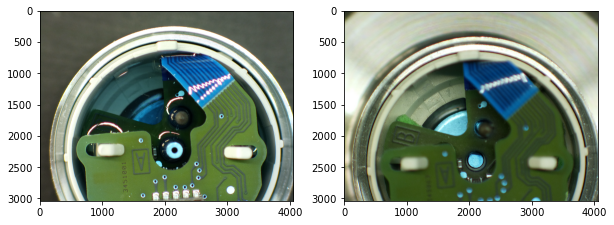

In [3]:
data_dir_good = 'Filling/good'
data_dir_bad = 'Filling/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

for file_good, file_bad in zip(files_good, files_bad):
    if file_good[-3:] == 'jpg' and file_bad[-3:] == 'jpg':
        img_good = cv2.imread(os.path.join(data_dir_good, file_good))
        img_bad = cv2.imread(os.path.join(data_dir_bad, file_bad))
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(img_good)
        axs[1].imshow(img_bad)
        plt.show()
        break

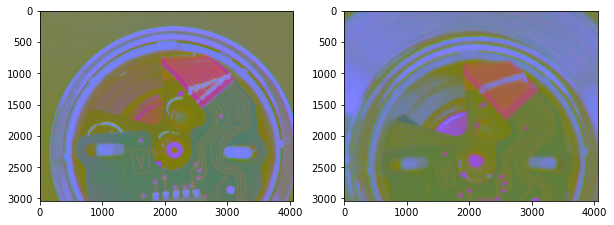

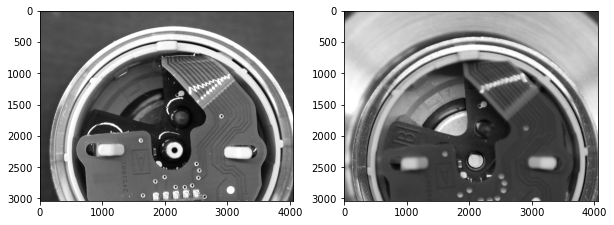

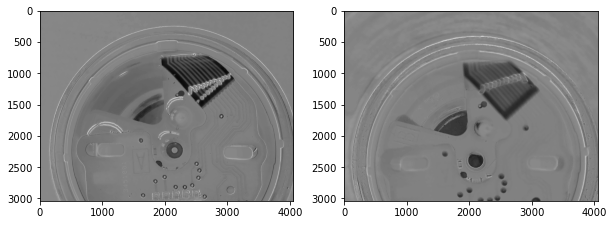

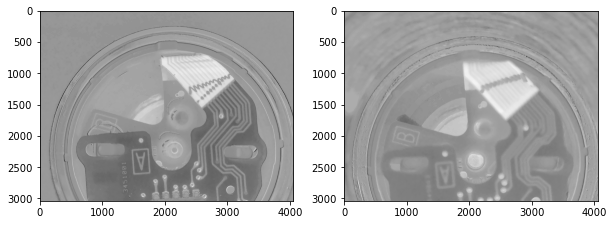

In [4]:
img_good_yuv = cv2.cvtColor(img_good, cv2.COLOR_BGR2YUV)
img_bad_yuv = cv2.cvtColor(img_bad, cv2.COLOR_BGR2YUV)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(img_good_yuv[...,::-1])
axs[1].imshow(img_bad_yuv[...,::-1])
plt.show()

for i in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(img_good_yuv[:, :, i], cmap='gray')
    axs[1].imshow(img_bad_yuv[:, :, i], cmap='gray')
    plt.show()

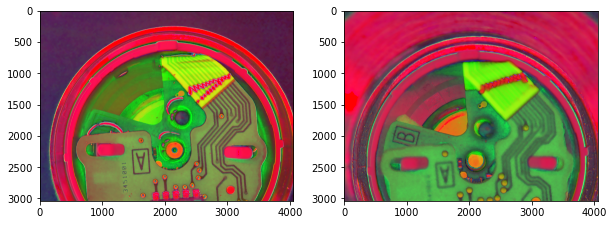

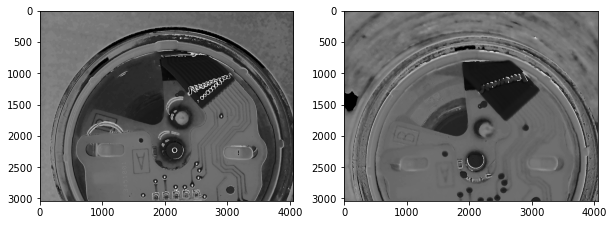

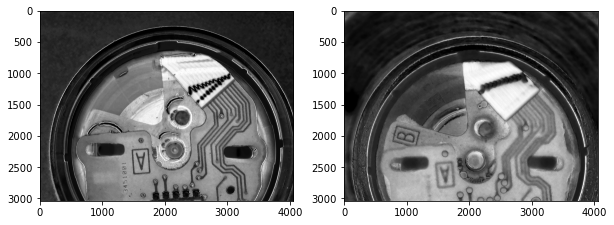

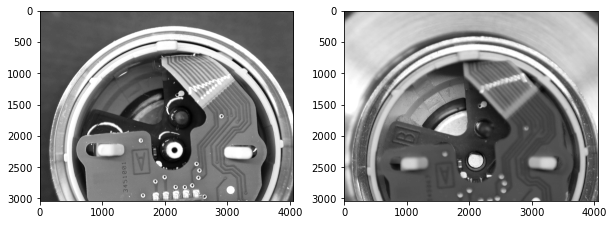

In [5]:
img_good_hsv = cv2.cvtColor(img_good, cv2.COLOR_BGR2HSV)
img_bad_hsv = cv2.cvtColor(img_bad, cv2.COLOR_BGR2HSV)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(img_good_hsv[...,::-1])
axs[1].imshow(img_bad_hsv[...,::-1])
plt.show()

for i in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(img_good_hsv[:, :, i], cmap='gray')
    axs[1].imshow(img_bad_hsv[:, :, i], cmap='gray')
    plt.show()

In [7]:
from __future__ import print_function
import cv2
import argparse

max_value_S = 255
max_value_V = 255
max_value_H = 360//2
low_H = 15
low_S = 33
low_V = 46
# high_H = max_value_H
# high_S = max_value_S
# high_V = max_value_V
high_H = 63
high_S = 212
high_V = 142
window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv2.setTrackbarPos(low_H_name, window_detection_name, low_H)
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv2.setTrackbarPos(high_H_name, window_detection_name, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv2.setTrackbarPos(low_S_name, window_detection_name, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv2.setTrackbarPos(high_S_name, window_detection_name, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv2.setTrackbarPos(low_V_name, window_detection_name, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv2.setTrackbarPos(high_V_name, window_detection_name, high_V)
# parser = argparse.ArgumentParser(description='Code for Thresholding Operations using inRange tutorial.')
# parser.add_argument('--camera', help='Camera divide number.', default=0, type=int)
# args = parser.parse_args()

# cap = cv2.VideoCapture(args.camera)
video_loc = 'D:/E+H/Glue_Detection/Filling/good/video.h264'
cap = cv2.VideoCapture('NEW_VIDEO.mp4')

if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cv2.namedWindow(window_capture_name)
cv2.namedWindow(window_detection_name)
cv2.createTrackbar(low_H_name, window_detection_name , low_H, max_value_H, on_low_H_thresh_trackbar)
cv2.createTrackbar(high_H_name, window_detection_name , high_H, max_value_H, on_high_H_thresh_trackbar)
cv2.createTrackbar(low_S_name, window_detection_name , low_S, max_value_S, on_low_S_thresh_trackbar)
cv2.createTrackbar(high_S_name, window_detection_name , high_S, max_value_S, on_high_S_thresh_trackbar)
cv2.createTrackbar(low_V_name, window_detection_name , low_V, max_value_V, on_low_V_thresh_trackbar)
cv2.createTrackbar(high_V_name, window_detection_name , high_V, max_value_V, on_high_V_thresh_trackbar)
while True:
    
    ret, frame = cap.read()
    if frame is None:
        break
    frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    frame_threshold = cv2.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    
    cv2.imshow(window_capture_name, cv2.resize(frame, (960, 540)))
    cv2.imshow(window_detection_name, cv2.resize(frame_threshold, (960, 540)))

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()

In [28]:
# os.system("ffprobe D:/E+H/Glue_Detection/Filling/good/video.h264")

0

In [31]:
# os.system("ffmpeg -find_stream_info -i D:/E+H/Glue_Detection/Filling/bad/video.h264 -map 0 -codec copy -codec:s mov_text NEW_VIDEO2.mp4")

0

In [37]:
 (low_H, low_S, low_V), (high_H, high_S, high_V)
#     ((15, 33, 46), (63, 212, 142))

((15, 33, 46), (63, 212, 142))

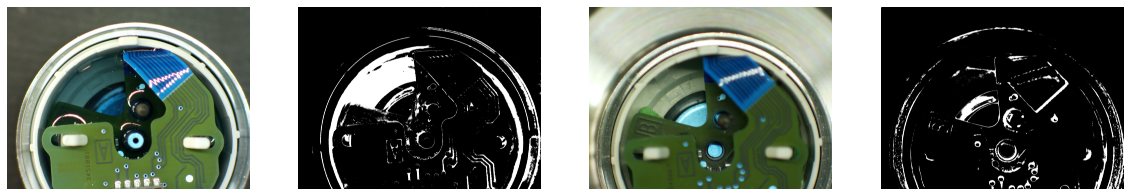

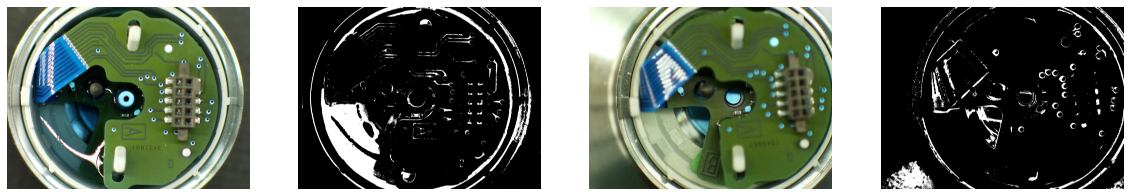

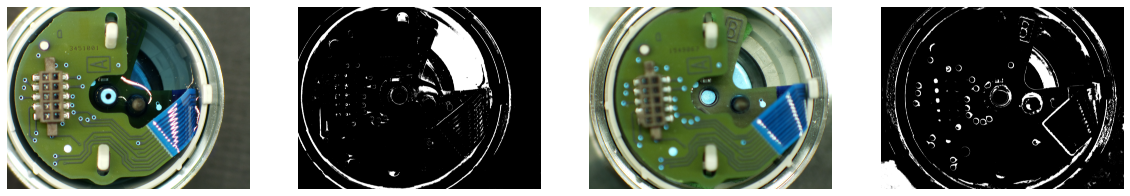

In [8]:
data_dir_good = 'Filling/good'
data_dir_bad = 'Filling/bad'

files_good = os.listdir(data_dir_good)
files_bad = os.listdir(data_dir_bad)

for file_good, file_bad in zip(files_good, files_bad):
    if file_good[-3:] == 'jpg' and file_bad[-3:] == 'jpg':
        img_good = cv2.imread(os.path.join(data_dir_good, file_good))
        img_bad = cv2.imread(os.path.join(data_dir_bad, file_bad))
        
        img_good_hsv = cv2.cvtColor(img_good, cv2.COLOR_BGR2HSV)
        img_bad_hsv = cv2.cvtColor(img_bad, cv2.COLOR_BGR2HSV)
        
        hsv_good_thr = cv2.inRange(img_good_hsv, (low_H, low_S, low_V), (high_H, high_S, high_V))
        hsv_bad_thr = cv2.inRange(img_bad_hsv, (low_H, low_S, low_V), (high_H, high_S, high_V))
        
        fig, axs = plt.subplots(1, 4, figsize=(20, 4))
        [axi.set_axis_off() for axi in axs.ravel()]
        axs[0].imshow(img_good)
        axs[1].imshow(hsv_good_thr, cmap='gray')
        axs[2].imshow(img_bad)
        axs[3].imshow(hsv_bad_thr, cmap='gray')
        plt.show()

In [51]:
## training data, why?
## more pictures: detect?
## 


## hole detection: